The Battle of the Neighborhoods - Week 1

Introduction & Business Problem :

Problem Background:
Manchester is the third most populous city in the UK, and is increasingly becoming a major economic area within europe. It provides lots of business oppourtunities and is becoming one of the best places in the world to invest in real estate.  It is a global hub of business and commerce, and has become a major centre of tourism, the arts, finance, technology and virtually every major business industry there is.

Problem Description:
As Manchester's industry grows it is important for investors to discover which areas within the city provide the best oppurtunities, and additionally find out what is the most populous business opportunity by each area within the city. To do achieve this goal, it is important to cluster each area within Manchester and discover the most popular business opportunities by area. Given Manchester's thriving food and drink scene I am going to attempt to identify the area of Manchester which provides the best opportunity to open an asian restuarant. 

Data Description:
The data I am going to use is going to be gained from a combination of different sources. Foursquares' API is probably the most comprehensive, but I will also look at attempting to webscrape some data from required websites. From Foursquare's API I will  be able to retrieve detailed data including venue names and potential classifiers, and this will be the most useful in completing the eventual aims of the project. 



In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from pandas.io.json import json_normalize
import json
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import sys
!pip install folium
import folium

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
site = requests.get("https://en.wikipedia.org/wiki/M_postcode_area").text
soup = BeautifulSoup(site, 'lxml')

In [ ]:
url ='https://en.wikipedia.org/wiki/M_postcode_area'

dfs = pd.read_html(url)
df = dfs[1]
df.head()

In [4]:
df.shape

(52, 4)

In [5]:
!wget -q -O "manchester_coordinates.csv" https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv
coors = pd.read_csv('manchester_coordinates.csv')

In [6]:
coors.head()

,id,postcode,latitude,longitude
0,2,AB10,57.13514,-2.11731
1,3,AB11,57.13875,-2.09089
2,4,AB12,57.10100,-2.11060
3,5,AB13,57.10801,-2.23776
4,6,AB14,57.10076,-2.27073


In [7]:
coors1 = coors[coors["postcode"].str.startswith('M')]
coors1.head()

,id,postcode,latitude,longitude
1522,1524,M1,53.47734,-2.23508
1523,1525,M11,53.47834,-2.17933
1524,1526,M12,53.46482,-2.20187
1525,1527,M13,53.46030,-2.21389
1526,1528,M14,53.44770,-2.22437


In [8]:
coors1.shape

(106, 4)

In [9]:
df_temp = df.set_index('Postcode district')
coors1_temp = coors1.set_index('postcode')
df_coors = pd.concat([df_temp, coors1_temp], axis=1, join='inner')

In [10]:
df_coors.dropna()
del df_coors['id']
df_coors.head()

,Post town,Coverage,Local authority area(s),latitude,longitude
M1,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.47734,-2.23508
M2,MANCHESTER,"Deansgate, City Centre",Manchester,53.48003,-2.24263
M4,MANCHESTER,"Ancoats, Northern Quarter, Strangeways",Manchester,53.48455,-2.22909
M5,SALFORD,"Ordsall, Seedley, Weaste, University",Salford,53.47903,-2.28482
M6,SALFORD,"Pendleton, Irlams o' th' Height, Langworthy, S...",Salford,53.49159,-2.29696


In [11]:
df_coors.shape

(44, 5)

So now we have the lattitude and longitude positions for every postdode district in Manchester along with a description of which areas those postcode districts cover.

In [12]:
CLIENT_ID = "DB5C25FPKWLUZVISMN2HIPQVSASISLRWFKT24ZOHSCLNHPQM" # your Foursquare ID
CLIENT_SECRET = "QRWBGZKAEOGCJHPYCDUKGOUIKKJJUPRZI1ED3FEVKTHEJSEW" # your Foursquare Secret
VERSION = "20180604"
LIMIT = 100

In [13]:
categoryIds = ['4bf58dd8d48988d142941735',
    '4bf58dd8d48988d145941735',
    '4bf58dd8d48988d111941735',
    '4bf58dd8d48988d113941735'] 
radius = 1000
categoryIds

['4bf58dd8d48988d142941735',
 '4bf58dd8d48988d145941735',
 '4bf58dd8d48988d111941735',
 '4bf58dd8d48988d113941735']

In [14]:
postcodes= df_coors.index
postcodes

Index(['M1', 'M2', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23',
       'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33',
       'M34', 'M35', 'M38', 'M40', 'M41', 'M43', 'M44', 'M45', 'M46', 'M50',
       'M61', 'M90', 'M99'],
      dtype='object')

In [15]:
postcodes = ['M1', 'M2', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M11', 'M12', 'M13','M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23','M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33','M34', 'M35', 'M38', 'M40', 'M41', 'M43', 'M44', 'M45', 'M46', 'M50','M61', 'M90', 'M99']

In [28]:
venues_df = pd.DataFrame(columns = ['id', 'name', 'category', 'postcode', 'location.lat', 'location.lng'])
count = 0
for b in range(len(categoryIds)):
   for x in range(len(postcodes)):
      address = "Manchester, " + postcodes[x]
      categoryId = categoryIds[int(b)]
      url = 'https://api.foursquare.com/v2/venues/search?&client_id=MQHKJ53MZHBDNU3G5XF4YASFCM4JX1KNN1QRTYG3ZVSQVTBC&client_secret=KUK4R1D1MWNMCKCIFBUDXY2543CORSN350VAH50J3ZWRHFPA&v=20180604&categoryId=4bf58dd8d48988d142941735,4bf58dd8d48988d145941735,4bf58dd8d48988d111941735,4bf58dd8d48988d113941735&near="Manchester"&radius=1000&limit=100'
      results = requests.get(url).json() 
      venues = results['response']['venues']
      dataframe = pd.json_normalize(venues)
      filtered_columns = ['id', 'name', 'categories', 'location.postalCode', 'location.lat', 'location.lng']
      if dataframe.shape != (0, 0): 
         dataframe_filtered = dataframe.loc[:, filtered_columns]
         for y in range(len(dataframe_filtered.index)):
            a = dataframe.iloc[y,2]
            a0 = a[0]
            category = a0['name'] 
            venues_df.loc[count] = [dataframe_filtered.iloc[y, 0],         dataframe_filtered.iloc[y, 1], category, postcodes[x], dataframe_filtered.iloc[y, 4], dataframe_filtered.iloc[y, 5]]
            count += 1
      
        

In [29]:
venues_df.head()

,id,name,category,postcode,location.lat,location.lng
0,5b6e368ee97dfb002cefffc7,Buba Noodle Bar,Vietnamese Restaurant,M1,42.993649,-71.461946
1,4be436f878e895211b8b64ce,Koi Japan,Japanese Restaurant,M1,42.991822,-71.463434
2,4f323e0e19836c91c7c43e13,Pete's Dragon,Chinese Restaurant,M1,42.995411,-71.451573
3,5c0c62fb916bc1002b85ab3b,Noodz,Asian Restaurant,M1,42.991959,-71.463383
4,4b3bd473f964a5200c7c25e3,Thousand Crane,Chinese Restaurant,M1,42.992562,-71.463390


In [71]:
df_temp1 = venues_df.set_index('postcode')
df_final = pd.concat([df_temp1, df_coors], axis=1, join='inner')

In [68]:
df_final.head()

,id,name,category,location.lat,location.lng,Post town,Coverage,Local authority area(s),latitude,longitude
M1,5b6e368ee97dfb002cefffc7,Buba Noodle Bar,Vietnamese Restaurant,42.993649,-71.461946,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.47734,-2.23508
M1,4be436f878e895211b8b64ce,Koi Japan,Japanese Restaurant,42.991822,-71.463434,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.47734,-2.23508
M1,4f323e0e19836c91c7c43e13,Pete's Dragon,Chinese Restaurant,42.995411,-71.451573,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.47734,-2.23508
M1,5c0c62fb916bc1002b85ab3b,Noodz,Asian Restaurant,42.991959,-71.463383,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.47734,-2.23508
M1,4b3bd473f964a5200c7c25e3,Thousand Crane,Chinese Restaurant,42.992562,-71.463390,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.47734,-2.23508


In [53]:
df_final['category'].value_counts()

Chinese Restaurant       352
Sushi Restaurant         176
Vietnamese Restaurant    176
Japanese Restaurant      176
Asian Restaurant         176
Name: category, dtype: int64

Text(0, 0.5, 'Frequency')

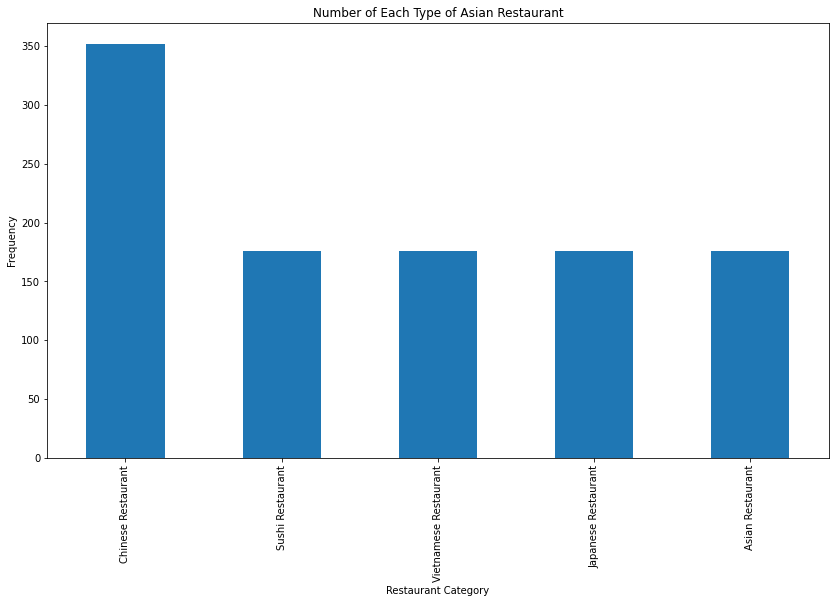

In [57]:
plot1 = df_final['category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Each Type of Asian Restaurant")
plot1.set_xlabel("Restaurant Category")
plot1.set_ylabel("Frequency")

In [72]:
dfind = df_final.reset_index().rename(columns={'index': 'postcode'})

In [91]:
p= dfind.groupby('Local authority area(s)')['category'].value_counts()
print(p)

Local authority area(s)  category             
Bury                     Chinese Restaurant        16
                         Asian Restaurant           8
                         Japanese Restaurant        8
                         Sushi Restaurant           8
                         Vietnamese Restaurant      8
Bury, Bolton             Chinese Restaurant         8
                         Asian Restaurant           4
                         Japanese Restaurant        4
                         Sushi Restaurant           4
                         Vietnamese Restaurant      4
Manchester               Chinese Restaurant       136
                         Asian Restaurant          68
                         Japanese Restaurant       68
                         Sushi Restaurant          68
                         Vietnamese Restaurant     68
Manchester, Stockport    Chinese Restaurant         8
                         Asian Restaurant           4
                         Japanese R

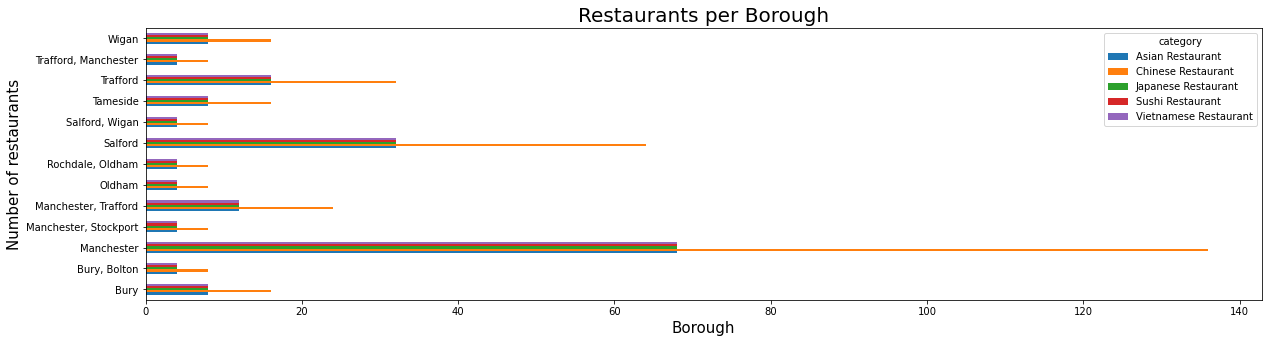

In [90]:
dfind.groupby('Local authority area(s)').category.value_counts().unstack(1).plot.barh(figsize=(20,5))
plt.title('Restaurants per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of restaurants',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

After plotting the number of each restaurant type by each local authority, it is clear that the Manchester area (or the city centre) is by far the most popular area for asian restaurants which is to be expected, since this is the main economic area and most populous of the entire Manchester region. Earlier it was discovered that chinese restaurants are by far the most popular type of asian restaurant which shows a great deal of demand for this cuisine. However, interestingly the proportions of chinese to other types of restaurant categories are strikingly simalar. This is most likely due to the limitations of the API request and not recieving a full rounded view of all restuarants within the area. It is also shown that Salford is the second most popular place to open a restuarant. This could be due to the increases in population for this area due to it's close proximity to Manchester. Perhaps this may be the fastest growing market for asian restaurants of all. Further anal 